# Standard Cuts Cross-section Analysis 




In [1]:
run ../prep_ana.py

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Loading plotting specs...
8 or 13 TeV:
Loading 8TeV
unc_mc_process and scales as dictionaries
Load MC and Data?True
Correct MET?True
df = pd.concat([df_dy0, df_dy1, df_dy2, df_dy3, df_dy4, df_dy_m_10, df_ww, df_tt_l, df_tt_sl, df_zz_ln, df_wz_ln, df_wz_lq ])


In [2]:
%matplotlib inline

In [3]:
df_da_a = rp.read_root(data_path+"/muon_2012A_complete.root", columns=columns+["runNum", "eventNumb"])
df_da_b = rp.read_root(data_path+"/muon_2012B_complete.root", columns=columns+["runNum", "eventNumb"])
df_da_c = rp.read_root(data_path+"/muon_2012C_complete.root", columns=columns+["runNum", "eventNumb"])
df_da_d = rp.read_root(data_path+"/muon_2012D_complete.root", columns=columns+["runNum", "eventNumb"])

df_da = pd.concat([df_da_a, df_da_b, df_da_c, df_da_d]).reset_index()

In [4]:
df_da_a_el = rp.read_root(data_path+"/electron_2012A_complete.root", columns=columns+["runNum", "eventNumb"])
df_da_b_el = rp.read_root(data_path+"/electron_2012B_complete.root", columns=columns+["runNum", "eventNumb"])
df_da_c_el = rp.read_root(data_path+"/electron_2012C_complete.root", columns=columns+["runNum", "eventNumb"])
df_da_d_el = rp.read_root(data_path+"/electron_2012D_complete.root", columns=columns+["runNum", "eventNumb"])

df_da_el = pd.concat([df_da_a_el, df_da_b_el, df_da_c_el, df_da_d_el]).reset_index()
df_da = pd.concat( [df_da, df_da_el] ).reset_index()
df_da = df_da.drop(np.where(df_da[["runNum", "eventNumb"]].duplicated())[0])

(<matplotlib.figure.Figure at 0x23605a850>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x2371989d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x2365d6c10>], dtype=object))

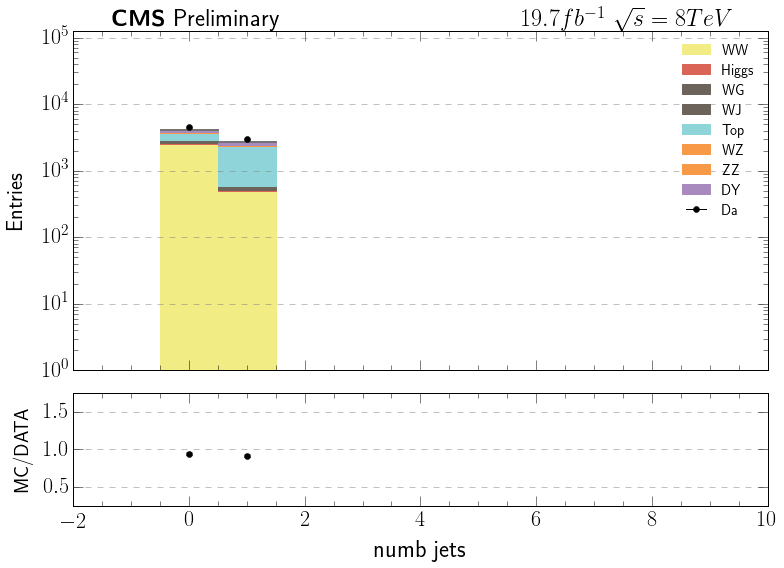

In [23]:
feature = "numb_jets"

mc = bin_df(cuts_ana(df), feature)
da = bin_df(cuts_ana(df_da), feature)

full_plot(mc, da, color="color_1")

# Plots

numb_BJet
HT
numb_jets
lep1_pt
jet1_pt
lep2_pt
jet2_pt
metMod
dPhiLL
METProj
qT
dPhiLLJet
met_phi
lep3_pt
tot_npv
mll
METProj_sin
met_over_sET
METProj_trk_sin
recoil
jet1_pt
dPhiLLMET
dPhiMETJet
mllMET


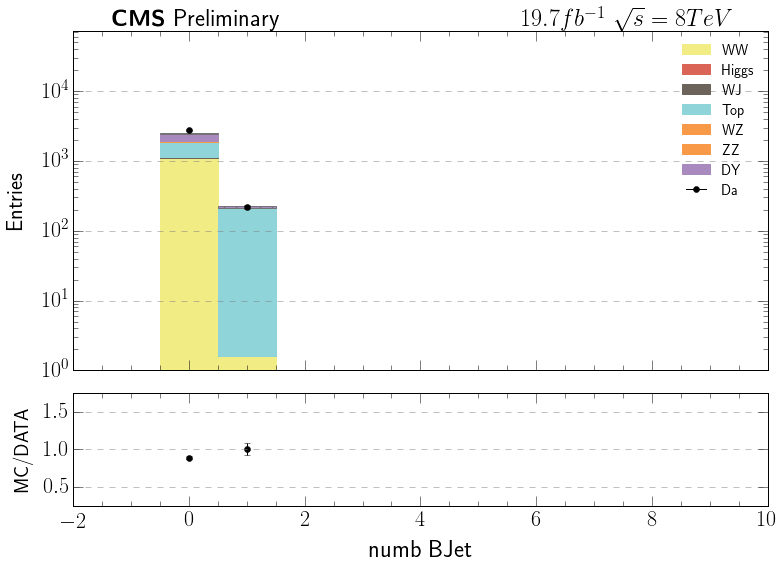

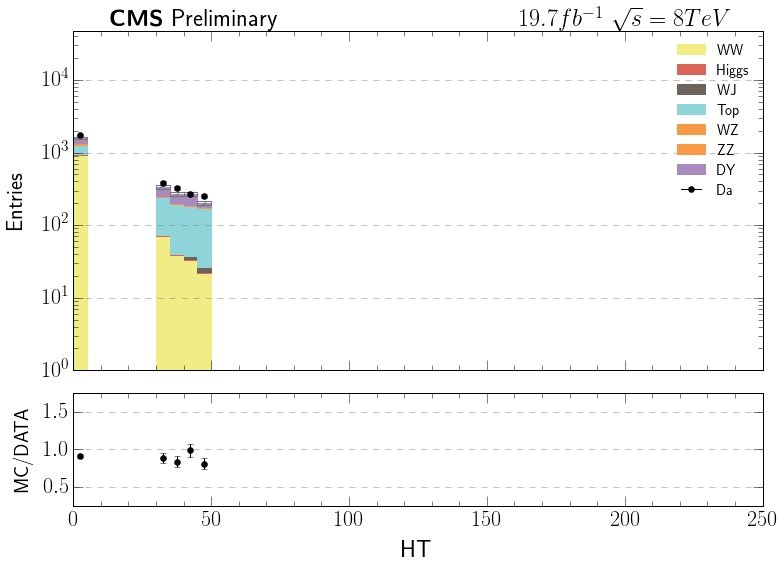

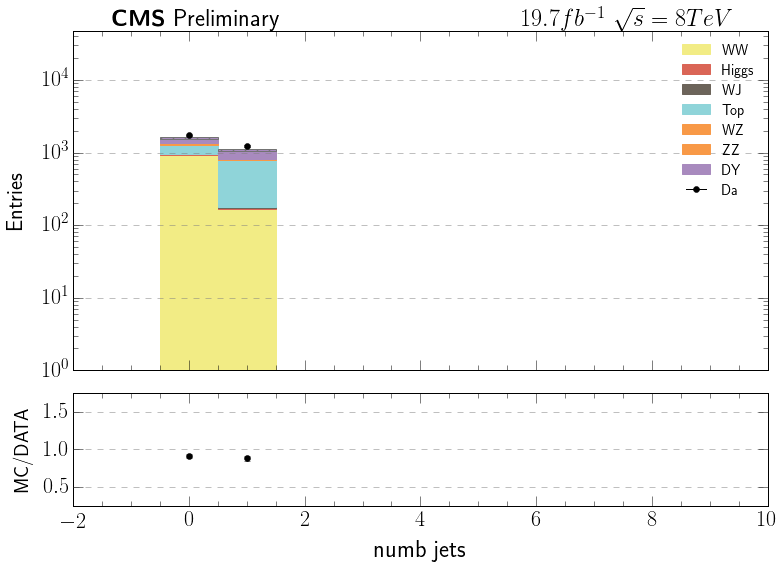

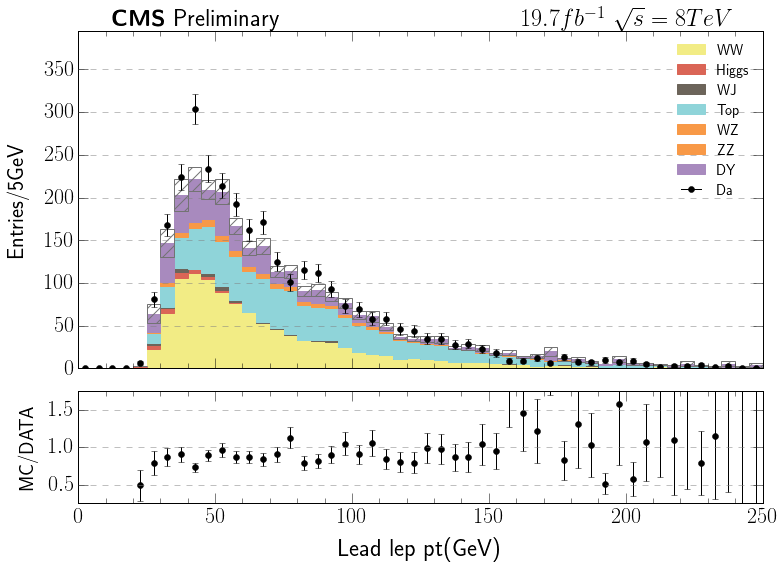

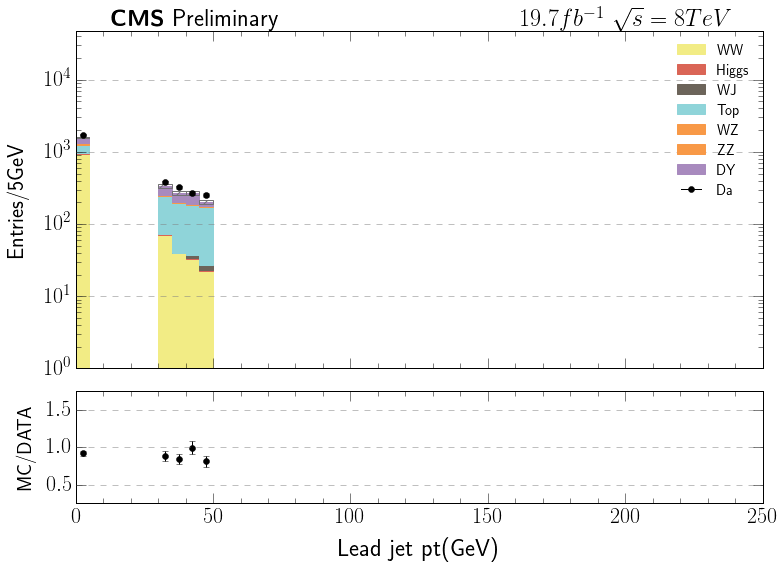

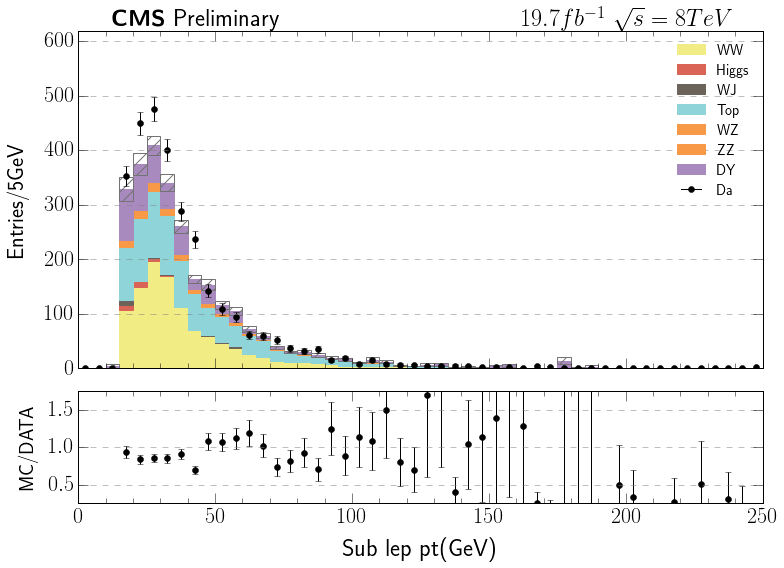

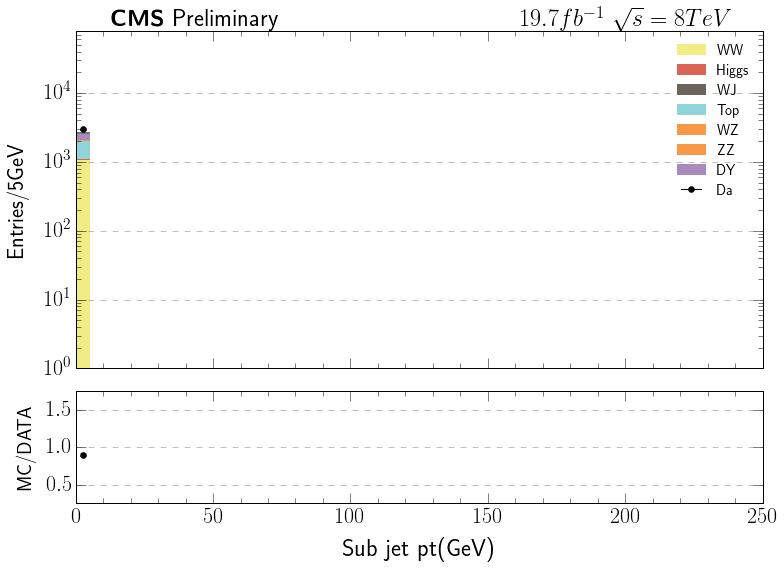

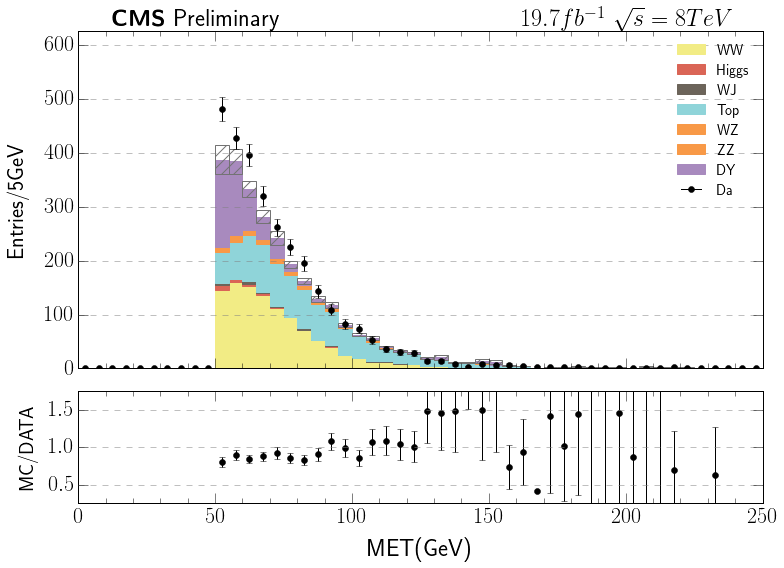

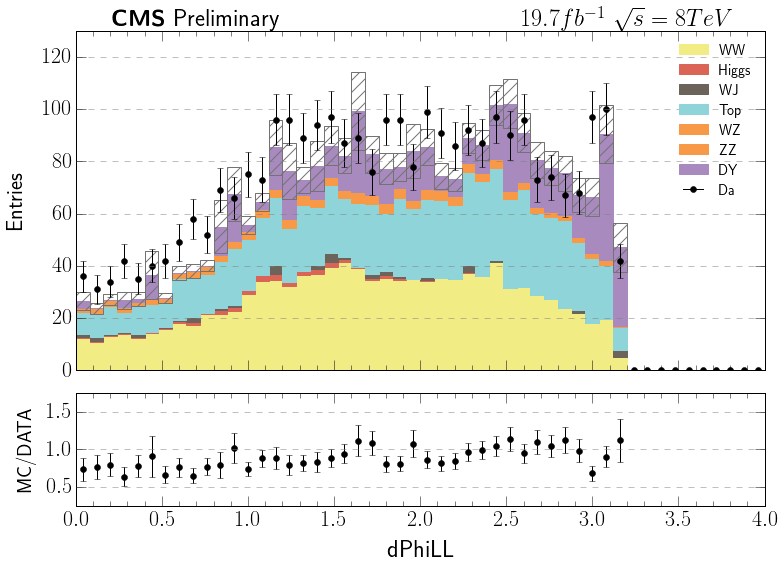

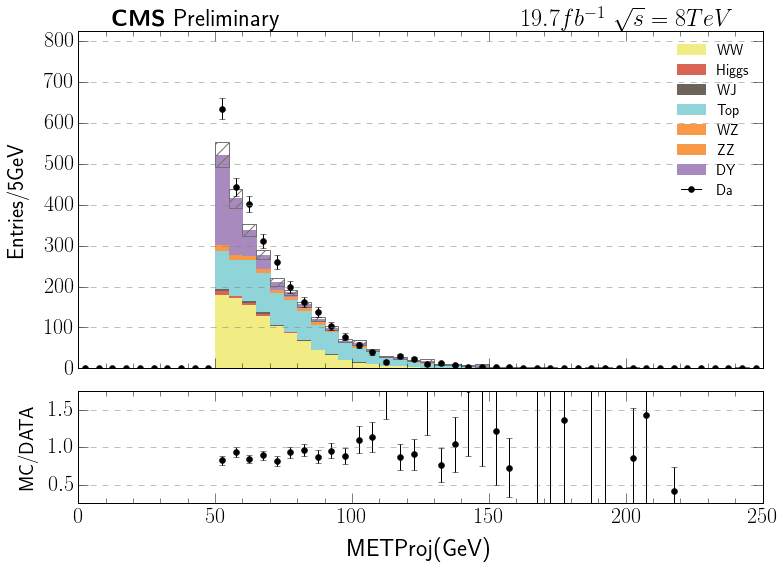

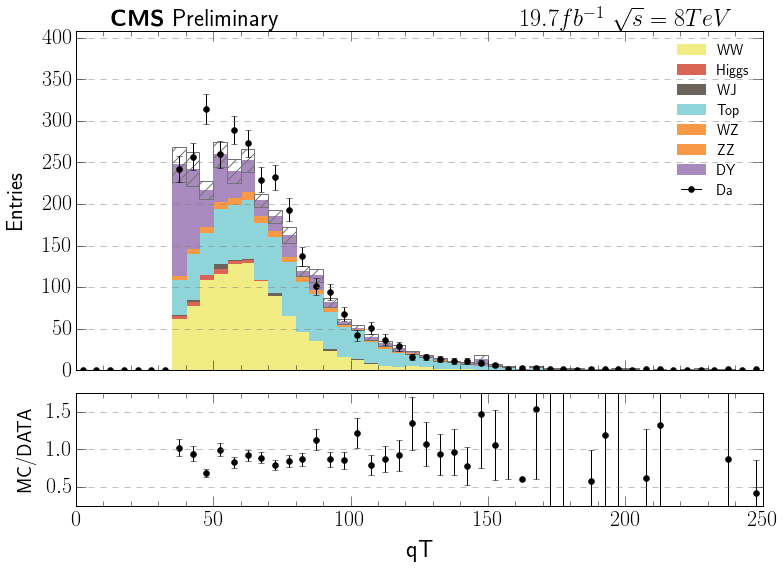

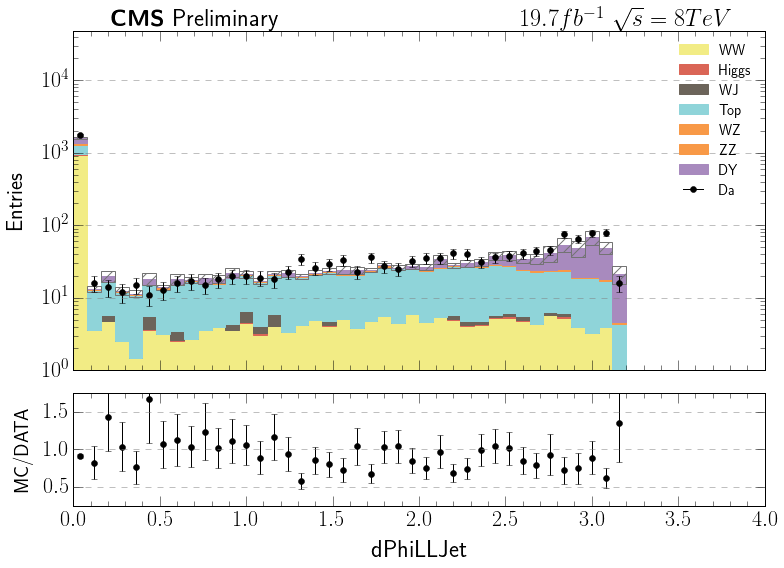

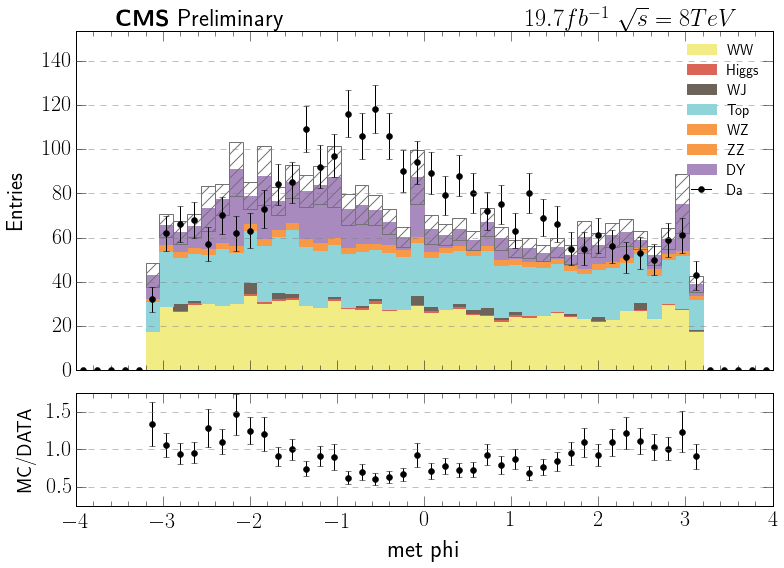

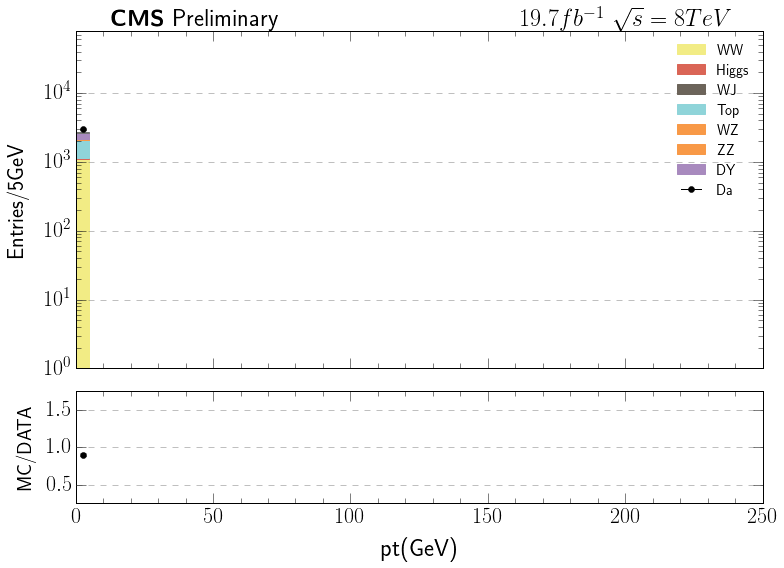

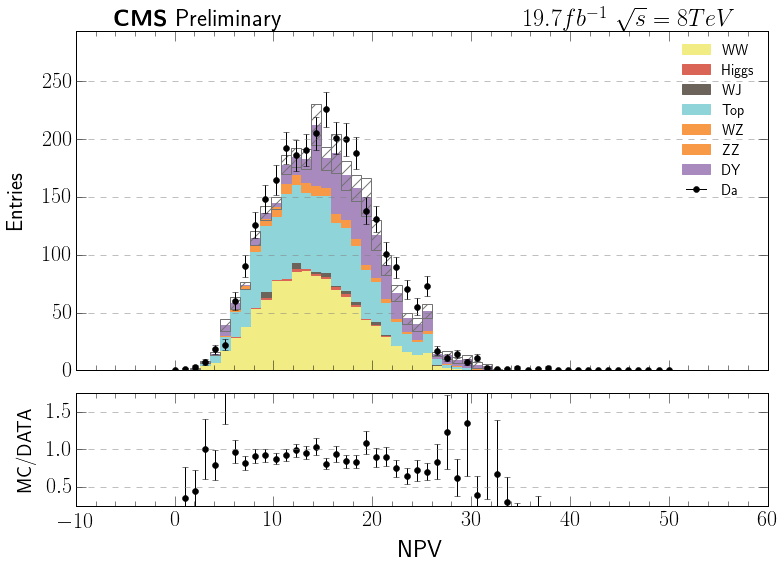

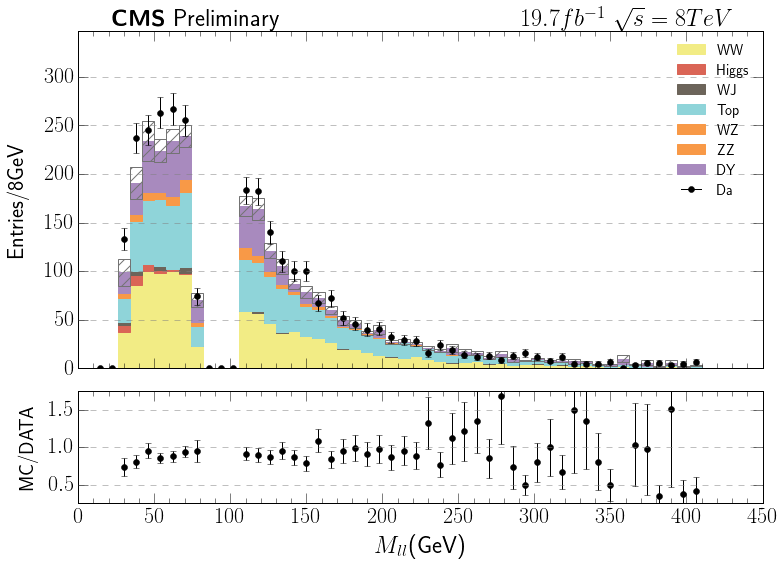

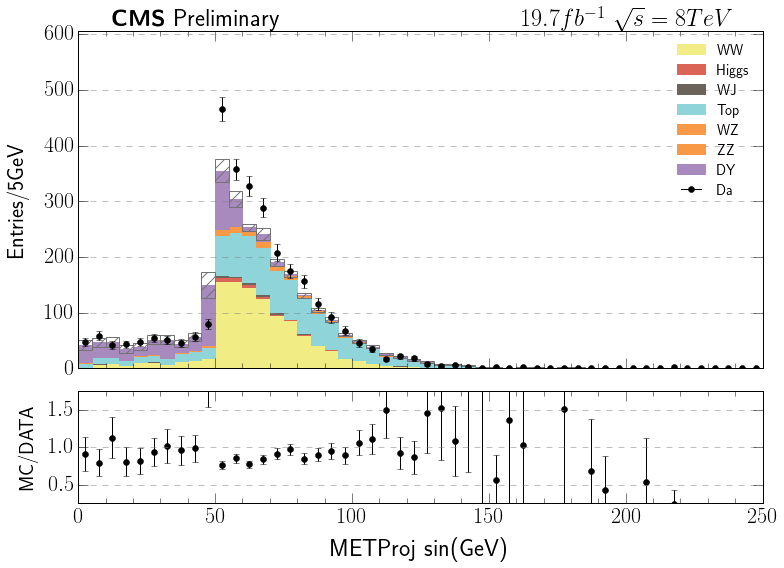

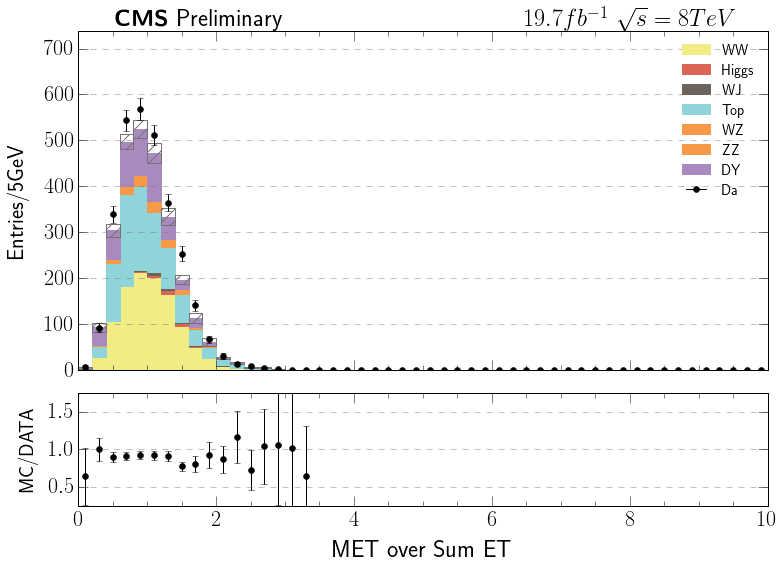

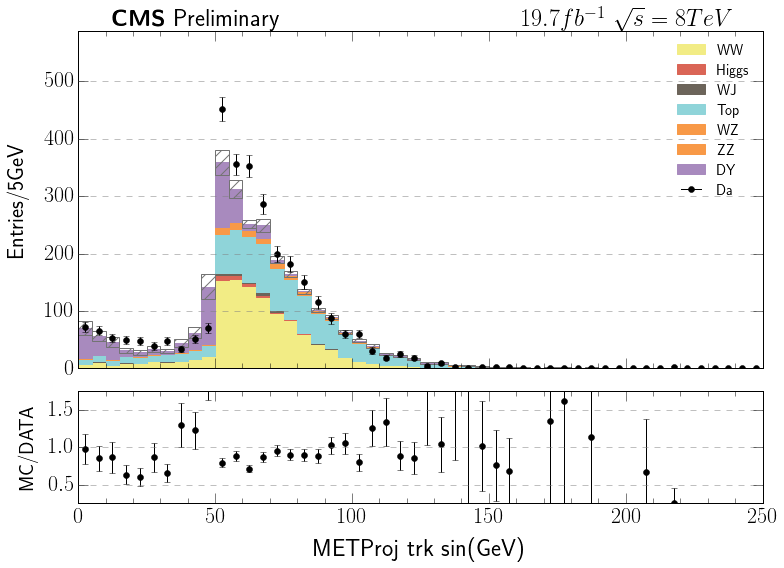

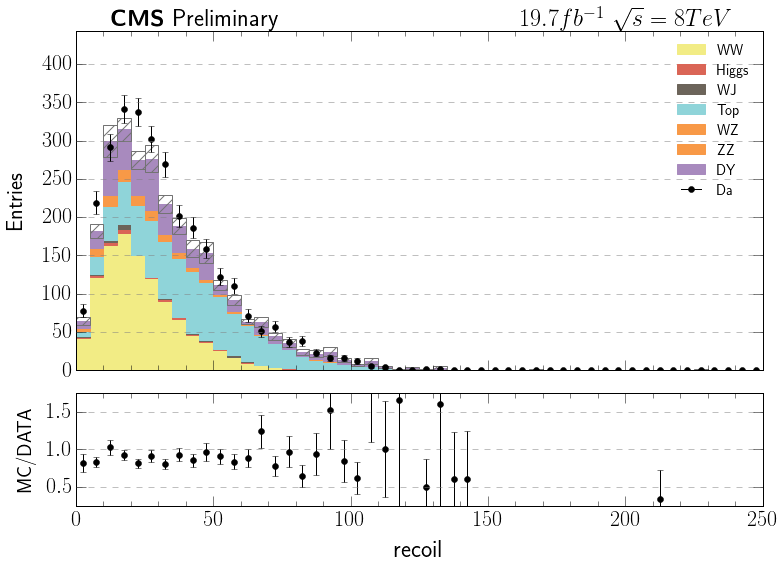

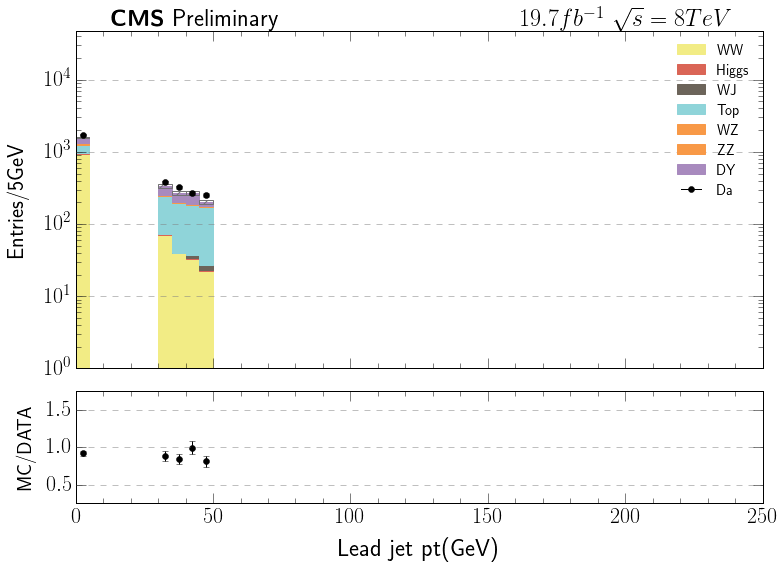

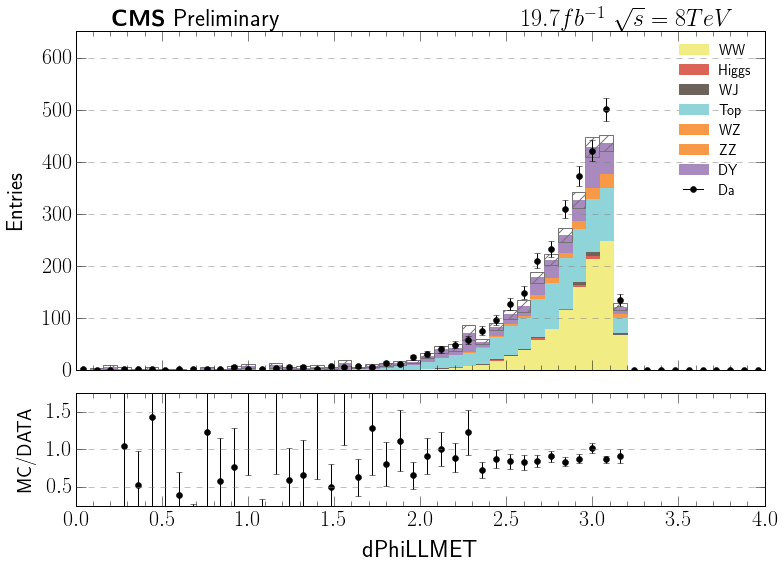

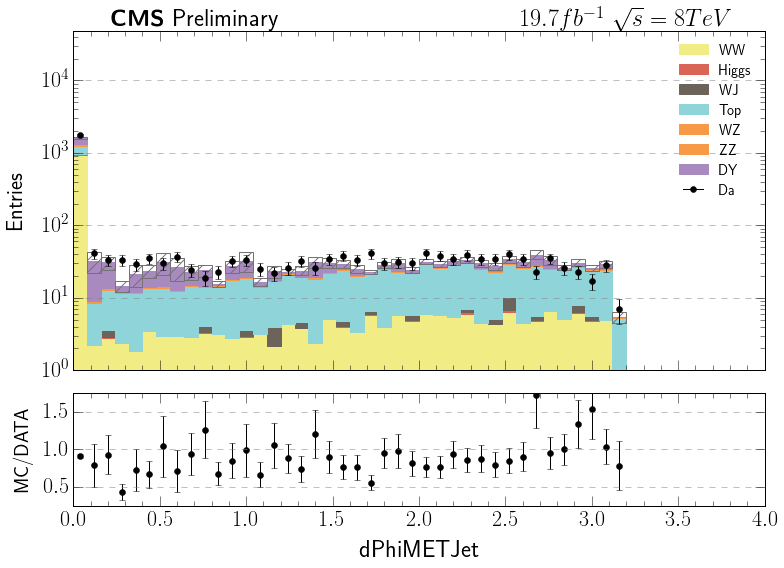

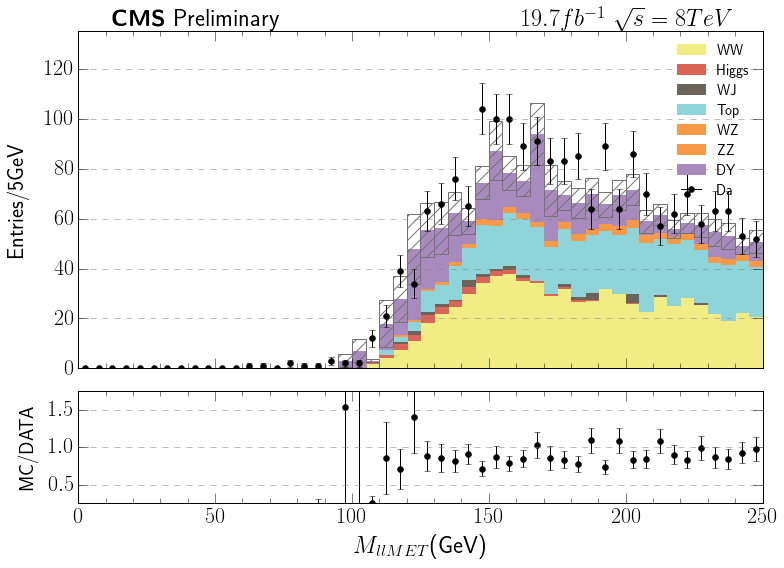

In [25]:
flavor = 'same'
#flavor = 'diff'
create_kinematic_hist(cuts_ana(df, flavor=flavor), cuts_ana(df_da, flavor=flavor), prefix="8TeV/cuts_based/cuts_"+flavor)

# Yields

In [28]:
df_yields = process_yields(cuts_ana(df, ), cuts_ana(df_da) )
save_df_to_html( df_yields, "yields.html")

WW 1141.22402411 1982.15775498
DY 656.00967071 196.44919945
Top 900.427048791 1618.20200294
WZ 55.027787807 56.6602063595
ZZ 54.2733342665 2.48802983621
WG 0.0 56.5292059526
Higgs 29.2302698136 32.7673305364
{'Diff Flavor': [1879, 103, 1982, 196, 1618, 57, 2, 57, 33, 230, 4175, 4181], 'Same Flavor': [1078, 63, 1141, 656, 900, 55, 54, 0, 29, 65, 2901, 2955], 'Process': ['WW', 'GluGluToWWTo4L', 'WW', 'DY', 'Top', 'WZ', 'ZZ', 'WG(*)', 'Higgs', 'WJ', 'Total', 'DATA']}


# Cross-sections

In [7]:
def calc_cross_stuff(df_mc, df_data, flavor="both"):
    lumi = 19.7e3
    eff  = .1247 #this had to be changed previously
    Br   = (3*.108)**2. 
    
    df_mc_c = df_mc[df_mc.lep1_Charge != df_mc.lep2_Charge]
    df_data_c = df_data[df_data.lep1_Charge != df_data.lep2_Charge]
    
    df_mc_c_s = df_mc[df_mc.lep1_Charge == df_mc.lep2_Charge]
    df_data_c_s = df_data[df_data.lep1_Charge == df_data.lep2_Charge]
    
    N_mc = sum([ cuts_ana(df_mc_c[df_mc_c.process_decay == process], flavor=flavor).weight.values.sum()*scales[process] for process in scales.keys() if process not in ['WW', 'W1JetsToLNu','W2JetsToLNu','W3JetsToLNu','W3JetsToLNu'] ])
    N_Wjets = cuts_ana(df_data_c_s, flavor=flavor).shape[0] -  np.array([ cuts_ana(df_mc_c_s[(df_mc_c_s.process_decay == process) ], flavor=flavor).weight.values.sum()*scales[process] for process in scales.keys() if process not in [ 'W1JetsToLNu','W2JetsToLNu','W3JetsToLNu','W3JetsToLNu'] ]).sum()
    N_mc += N_Wjets
    
    N_data = cuts_ana(df_data_c, flavor=flavor).shape[0]
    
    N_ww_select = cuts_ana(df_mc_c[df_mc_c.process_decay == "WW"], flavor=flavor).weight.values.sum()*scales["WW"]
    N_ww_tot = df_mc[df_mc.process_decay == "WW"].weight.values.sum()*scales["WW"]

    ratio_s_t = N_ww_select / N_ww_tot
    #print "MC", N_mc
    #print "DATA", N_data
    #print N_ww_select / N_ww_tot
    #print "WJ", N_Wjets
    return {"lumi": lumi, "eff": eff, "Br": Br, "N_mc": N_mc, "N_data": N_data, "ratio_s_t": ratio_s_t, "N_ww_select":N_ww_select, "N_Wjets": N_Wjets}

In [8]:
def stat_unc_calc(df_mc, df_data, flavor="both", fiducial=False, **kwargs):
    if kwargs:
        var = kwargs
    else:
        var = calc_cross_stuff(df_mc, df_data, flavor)
    lumi = var["lumi"]
    eff = var["eff"]
    Br = var["Br"]
    N_mc = var["N_mc"]
    N_data = var["N_data"]
    ratio_s_t = var["ratio_s_t"]
    N_ww_select = var["N_ww_select"]
    N_Wjets = var["N_Wjets"]
    
    cuts_mc = {process: cuts_ana(df_mc[(df_mc.process_decay == process) & (df_mc.lep1_Charge == df_mc.lep2_Charge)], flavor) for process in scales.keys()} 
    process_stat_unc = [ (cuts_mc[process].weight.values * cuts_mc[process].weight.values).sum()  * scales[process]**2 for process in cuts_mc.keys() if process not in ['WW', 'W1JetsToLNu','W2JetsToLNu','W3JetsToLNu','W3JetsToLNu']] 
    
    WW_stat_unc = (cuts_mc["WW"].weight.values * cuts_mc["WW"].weight.values).sum() * scales["WW"]**2. * ratio_s_t**2. / N_ww_select**2.
    
    #print "Process stat", process_stat_unc
    #print "WW stat",WW_stat_unc
    if fiducial == False:
        return 1. / (lumi * eff * Br * ratio_s_t) * ( N_data + sum(process_stat_unc) + WW_stat_unc + N_Wjets)**.5
    else:
        return 1. / (lumi * eff ) * ( N_data + sum(process_stat_unc) + N_Wjets)**.5

In [9]:
def sys_unc_calc(df_mc, df_data, flavor="both", fiducial=False, **kwargs):
    if kwargs:
        var = kwargs
    else:
        var = calc_cross_stuff(df_mc, df_data, flavor)
    lumi = var["lumi"]
    eff = var["eff"]
    Br = var["Br"]
    N_mc = var["N_mc"]
    N_data = var["N_data"]
    ratio_s_t = var["ratio_s_t"]
    N_ww_select = var["N_ww_select"]
    N_Wjets = var["N_Wjets"]
    
    cuts_mc = {process: cuts_ana(df_mc[(df_mc.process_decay == process) & (df_mc.lep1_Charge == df_mc.lep2_Charge)], flavor) for process in scales.keys()} 
    process_sys_unc = [ scales[process]**2. * unc_mc_process[process]**2 * cuts_mc[process].weight.sum()**2. for process in cuts_mc.keys() if process not in ['WW', 'W1JetsToLNu','W2JetsToLNu','W3JetsToLNu','W3JetsToLNu']] 

    WW_sys_unc = unc_mc_process["WW"]**2 * ratio_s_t**2. / N_ww_select**2.
    Wjets_sys_unc = N_Wjets**2. 
    
    if fiducial == False:
        return 1. / (lumi * eff * Br * ratio_s_t)  * ( sum(process_sys_unc) +  WW_sys_unc + Wjets_sys_unc)**.5
    else:
        return 1. / (lumi * eff )  * ( sum(process_sys_unc) + Wjets_sys_unc)**.5

In [10]:
def cross_calc(df_mc, df_data, flavor="both", fiducial=False, **kwargs):
    if kwargs:
        var = kwargs
        print "Got them words"
    else:
        var = calc_cross_stuff(df_mc, df_data, flavor)
    lumi = var["lumi"]
    eff = var["eff"]
    Br = var["Br"]
    N_mc = var["N_mc"]
    N_data = var["N_data"]
    ratio_s_t = var["ratio_s_t"]
    N_ww_select = var["N_ww_select"]
    N_Wjets = var["N_Wjets"]
    
    if fiducial == False:
        return (N_data - N_mc) / (lumi * eff * Br *ratio_s_t)
    else:
        return (N_data - N_mc) / (lumi * eff )
    #return N_ww_select / (lumi * eff * Br *ratio_s_t)

In [11]:
full = {}

flavor = 'both'
kwds = calc_cross_stuff(df, df_da, flavor)
full['both'] = [ cross_calc(df, df_da, flavor=flavor, **kwds), stat_unc_calc(df, df_da, flavor, **kwds), sys_unc_calc(df, df_da, flavor, **kwds)]
print full['both']

flavor = 'same'
kwds = calc_cross_stuff(df, df_da, flavor)
full['same'] = [cross_calc(df, df_da, flavor=flavor, **kwds), stat_unc_calc(df, df_da, flavor, **kwds), sys_unc_calc(df, df_da, flavor, **kwds)]
print full['same']

flavor = 'diff'
kwds = calc_cross_stuff(df, df_da, flavor)
full['diff'] = [ cross_calc(df, df_da, flavor=flavor, **kwds), stat_unc_calc(df, df_da, flavor, **kwds), sys_unc_calc(df, df_da, flavor, **kwds)]
print full['diff']

Got them words
[58.948046030561216, 1.5544768548528884, 2.1210137219850909]
Got them words
[64.056764035240761, 2.7104138618760891, 0.83748159839890246]
Got them words
[56.009613460203269, 1.888158372119227, 2.8691519996620127]


In [12]:
fiducial = {}

flavor = 'both'
kwds = calc_cross_stuff(df, df_da, flavor)
fiducial['both'] = [ cross_calc(df, df_da, flavor=flavor, fiducial=True, **kwds), stat_unc_calc(df, df_da, flavor, fiducial=True, **kwds), sys_unc_calc(df, df_da, flavor, fiducial=True, **kwds)]
print flavor, fiducial['both']

flavor = 'same'
kwds = calc_cross_stuff(df, df_da, flavor)
fiducial['same'] = [cross_calc(df, df_da, flavor=flavor, fiducial=True, **kwds), stat_unc_calc(df, df_da, flavor, fiducial=True, **kwds), sys_unc_calc(df, df_da, flavor, fiducial=True, **kwds)]
print flavor, fiducial['same']

flavor = 'diff'
kwds = calc_cross_stuff(df, df_da, flavor)
fiducial['diff'] = [ cross_calc(df, df_da, flavor=flavor, fiducial=True, **kwds), stat_unc_calc(df, df_da, flavor, fiducial=True, **kwds), sys_unc_calc(df, df_da, flavor, fiducial=True, **kwds)]
print flavor, fiducial['diff']


Got them words
both [1.3158767571134871, 0.034700046914374776, 0.047346652624108622]
Got them words
same [0.52213721477202646, 0.022093028988178328, 0.006826450192992088]
Got them words
diff [0.79373957999163913, 0.026758014216751603, 0.040660153899509367]


In [22]:
pd.DataFrame(fiducial)

,both,diff,same
0,1.359026,0.821013,0.538013
1,0.034966,0.026983,0.022239
2,0.048558,0.041873,0.006826


# Make cross-section table

In [3]:
from html import HTML

In [17]:
html_bot = HTML('html', 'text')

In [57]:
def make_cross_table(cross_dic):
    html_bot = HTML('html', 'text')
    t = html_bot.table( border="0", border_="collapse")
    key_syn = {"both": "Together", "same": "Same", "diff": "Different"}
    for key in cross_dic:
        r = t.tr
        for i, ele in enumerate(cross_dic[key]):
            prefix = ""
            postfix = ""
            if i == 0: r.td.b(key_syn[key]+":" , border="none")
            else: 
                prefix = "&plusmn;"
                if i == 1: postfix = "(stat)"
                if i == 2: postfix = "(sys)"
            r.td(prefix + str(round(ele, 2)) + postfix, border="none", escape=False)
    print t


In [59]:
make_cross_table(fiducial)

<table border="0" border_="collapse">
<tr><td><b border="none">Together:</b></td><td border="none">1.36</td><td border="none">&plusmn;0.03(stat)</td><td border="none">&plusmn;0.05(sys)</td></tr>
<tr><td><b border="none">Same:</b></td><td border="none">0.54</td><td border="none">&plusmn;0.02(stat)</td><td border="none">&plusmn;0.01(sys)</td></tr>
<tr><td><b border="none">Different:</b></td><td border="none">0.82</td><td border="none">&plusmn;0.03(stat)</td><td border="none">&plusmn;0.04(sys)</td></tr>
</table>


In [52]:
print t

<table border="0" border_="collapse">
<tr><td><b border="none">Together:</b></td><td border="none">1.36</td><td border="none">&plusmn;0.03</td><td border="none">&plusmn;0.05</td></tr>
<tr><td><b border="none">Same:</b></td><td border="none">0.54</td><td border="none">&plusmn;0.02</td><td border="none">&plusmn;0.01</td></tr>
<tr><td><b border="none">Different:</b></td><td border="none">0.82</td><td border="none">&plusmn;0.03</td><td border="none">&plusmn;0.04</td></tr>
</table>


<table border="0" border_="collapse">
<tr><td><b border="none">both:</b></td><td border="none">1.36</td><td border="none">&plusmn;0.03</td><td border="none">&plusmn;0.05</td></tr>
<tr><td><b border="none">same:</b></td><td border="none">0.54</td><td border="none">&plusmn;0.02</td><td border="none">&plusmn;0.01</td></tr>
<tr><td><b border="none">diff:</b></td><td border="none">0.82</td><td border="none">&plusmn;0.03</td><td border="none">&plusmn;0.04</td></tr>
</table>




In [30]:
html_bot.table()

<HTML table 0x1e9a6f7d0>

In [34]:
round( ele, 2)

0.04

# lep, met, jet shifts

In [4]:
def scale_shift(data, lep_pt=1.01, met=1.02, jet=1.02 ):
    data.lep1_pt = data.lep1_pt * lep_pt
    data.lep2_pt = data.lep2_pt * lep_pt
    data.mll = data.mll * lep_pt**.5
    
    
    data.metMod = data.metMod * met
    data.metProj = data.METProj * met
    
    data.mllMET = data.mllMET * met * lep_pt**.5
    
    
    data.HT = data.HT * jet

In [5]:
scale_shift(df_da)

In [14]:
bin_df?

In [16]:
df[df.lep1_pt > 200].lep_Type.unique()

array([-2, -1,  1])

(<matplotlib.figure.Figure at 0x2a8d258d0>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x265ee5ad0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x26d58d6d0>], dtype=object))

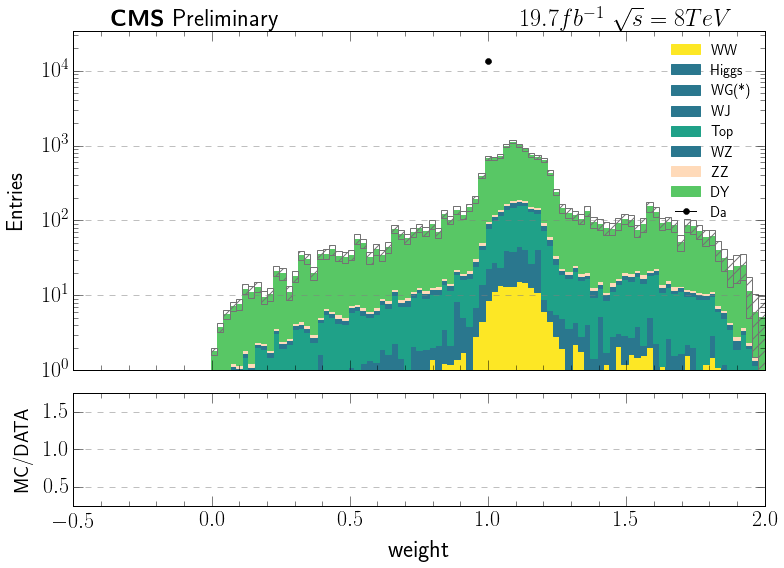

In [34]:
mc = bin_df(df[(df.lep1_pt > 200)], "weight", range=(-.25,2), bins=100)
data = bin_df(df_da[(df_da.lep1_pt > 200) ], "weight", range=(-.25,2), bins=100)

full_plot(mc, data, )

(array([  1.16403389e+04,   4.11955029e+03,   9.74806396e+02,
          2.02877090e+02,   3.52326164e+01,   5.64596748e+00,
          1.43888867e+00,   2.45719522e-01,   0.00000000e+00,
          0.00000000e+00]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 1 Patch objects>)

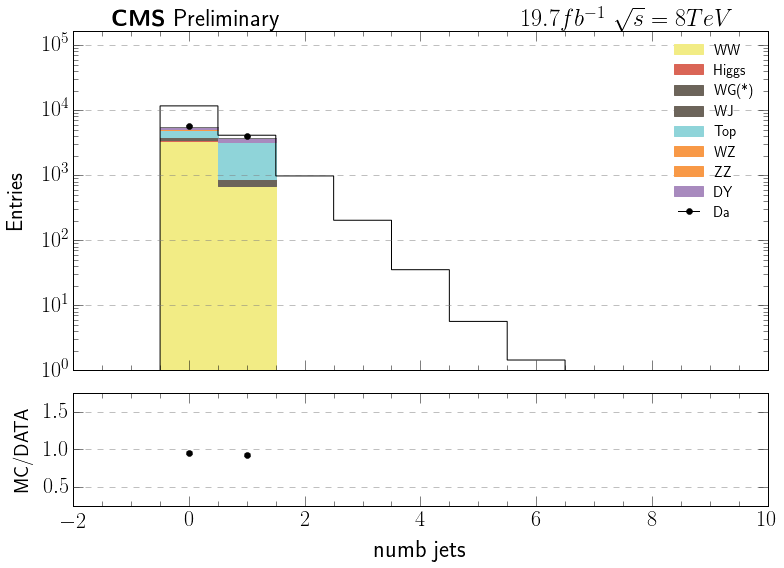

In [6]:
feature = "numb_jets"

bins_mc = bin_df( cuts_ana(df[(df.lep1_Charge != df.lep2_Charge) ]), feature)
bins_data = bin_df( cuts_ana(df_da[(df_da.lep1_Charge != df_da.lep2_Charge) ]), feature)

fig, ax = full_plot(bins_mc, bins_data, color="color_1", )#logy=False, y_range=(0,12500) )
pre_df = pre_df = pre_cuts(df, diff_charge=False)
ax[0].hist(pre_df[df.process == "WW"].numb_jets.values, weights=pre_df[pre_df.process == "WW"].weight.values * scales["WW"], range=(-.5, 9.5), histtype=u'step', color="black", label="MC WW")
